# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\byl19\Downloads\02-2023 Instacart Basket Analysis'

In [2]:
merged = pd.read_pickle(r'C:\Users\byl19\Downloads\02-2023 Instacart Basket Analysis\02 Data\Prepared Data\merged.pkl')

# 02. Questions

## 2.


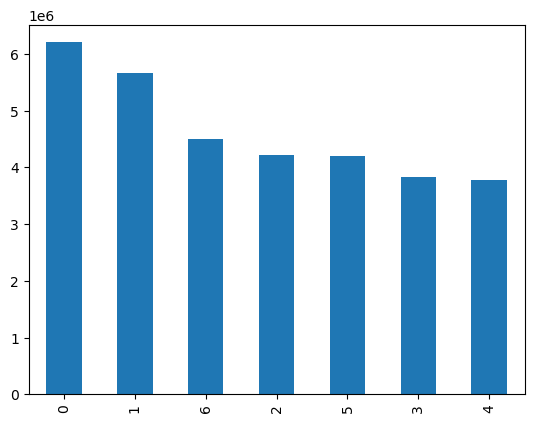

In [5]:
# bar chart
bar = merged['orders_day_of_week'].value_counts().plot.bar()

In [7]:
# histogram 
# finding outliers
merged.loc[merged['prices'] > 100]

user_id first_name last_name  gender         state  age date_joined  \
5547      117740       Lisa    Sparks  Female        Oregon   55    1/1/2017   
10303      31590    Beverly   Sanford  Female       Montana   46    1/1/2017   
27945     100958   Benjamin   Parsons    Male  North Dakota   18    1/2/2017   
27946     100958   Benjamin   Parsons    Male  North Dakota   18    1/2/2017   
27947     100958   Benjamin   Parsons    Male  North Dakota   18    1/2/2017   
...          ...        ...       ...     ...           ...  ...         ...   
32390922    5519      Kathy    Daniel  Female       Georgia   78    4/1/2020   
32390923    5519      Kathy    Daniel  Female       Georgia   78    4/1/2020   
32390924    5519      Kathy    Daniel  Female       Georgia   78    4/1/2020   
32396990  140589   Clarence    Harper    Male      Maryland   26    4/1/2020   
32399989  200065       Gary    Wilson    Male     Tennessee   59    4/1/2020   

          n_dependants                        fam_status  income  ...  \
5547                 1                           married  292759  ...   
10303                0                            single  154076  ...   
27945                2  living with parents and siblings  113408  ...   
27946                2  living with parents and siblings  113408  ...   
27947                2  living with parents and siblings  113408  ...   
...                ...                               ...     ...  ...   
32390922             3                           married  262610  ...   
32390923             3                           married  262610  ...   
32390924             3                           married  262610  ...   
32396990             0                            single  154845  ...   
32399989             3                           married  243617  ...   

           prices     price_range_loc    busiest days  busiest_period_of_day  \
5547      14900.0  High range product    Busiest days            Most orders   
10303     14900.0  High range product    Busiest days         Average orders   
27945     14900.0  High range product  Regularly busy         Average orders   
27946     14900.0  High range product    Busiest days            Most orders   
27947     14900.0  High range product    Busiest days            Most orders   
...           ...                 ...             ...                    ...   
32390922  14900.0  High range product    Slowest days            Most orders   
32390923  14900.0  High range product  Regularly busy         Average orders   
32390924  14900.0  High range product  Regularly busy            Most orders   
32396990  99999.0  High range product  Regularly busy         Average orders   
32399989  14900.0  High range product  Regularly busy            Most orders   

          max_order      loyalty_flag  average_price  spending_flag  \
5547             84    Loyal customer      36.928431   High spender   
10303            38  Regular customer      58.139865   High spender   
27945             5     New custsomer     627.991667   High spender   
27946             5     New custsomer     627.991667   High spender   
27947             5     New custsomer     627.991667   High spender   
...             ...               ...            ...            ...   
32390922         53    Loyal customer      69.638604   High spender   
32390923         53    Loyal customer      69.638604   High spender   
32390924         53    Loyal customer      69.638604   High spender   
32396990          9     New custsomer     876.974783   High spender   
32399989         18  Regular customer      96.595833   High spender   

         median_days    order_freq_flag  
5547             4.0  Frequent customer  
10303            8.0  Frequent customer  
27945           11.0   Regular customer  
27946           11.0   Regular customer  
27947           11.0   Regular customer  
...              ...                ...  
32390922         7.0  Frequent customer  
32390923         7.0 

In [9]:
# replacing outlier values
merged.loc[merged['prices'] > 200, 'prices'] = np.nan

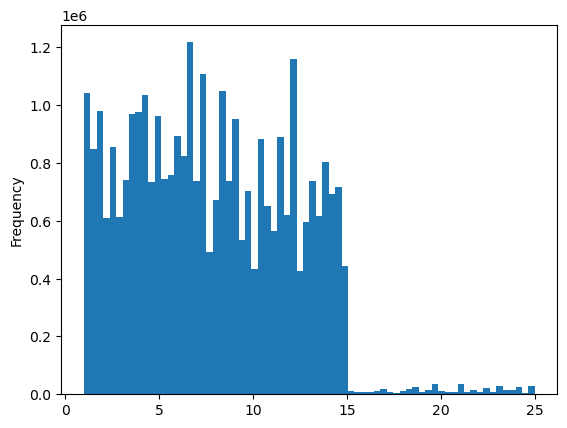

In [10]:
# making histogram
hist = merged['prices'].plot.hist(bins = 70)

<AxesSubplot:xlabel='prices', ylabel='prices'>

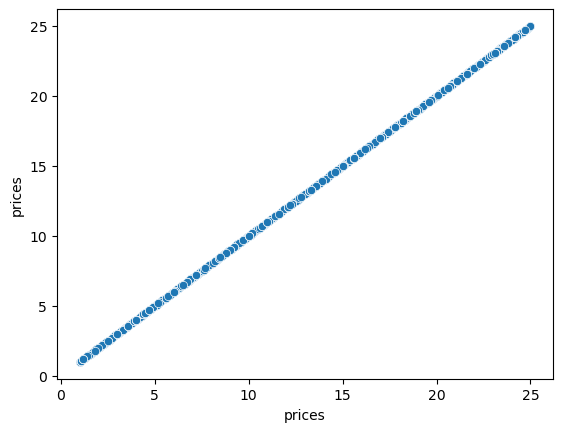

In [15]:
# scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = merged)

In [16]:
# line chart
# giving random seed and splitting data 70/30
np.random.seed(4)
dev = np.random.rand(len(merged)) <= 0.7

In [17]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
# assigning 70/30 split
big = merged[dev]
small = merged[~dev]

In [19]:
len(merged)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
#making data from out of 30 split
df_2 = small[['orders_day_of_week','prices']]

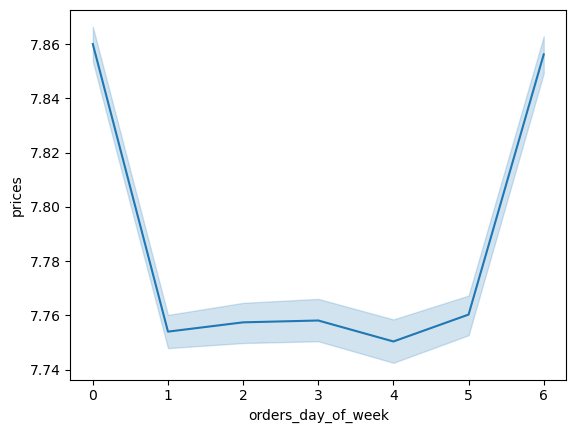

In [22]:
# line chart of 30 split
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [23]:
# save chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_prices.png'))

## 3. 

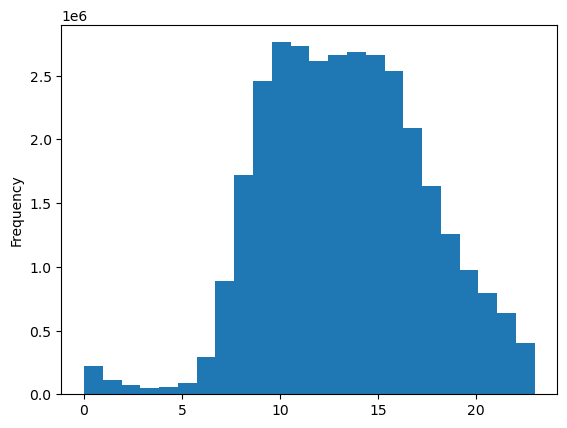

In [25]:
# order_hour_of_day histogram
hist2 = merged['order_hour_of_day'].plot.hist(bins = 24)

#3
This histogram is howing all 24 hours of the day in relation to the amount of orders during a certain hour. This histogram is showing most orders take place between the times of 9 and 16 while rising before 9 and decreasing after 16. This would make sense are those hours are during the day and everything around that is evening/night time. 

In [26]:
# saving image
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hours.png'))

## 4. 

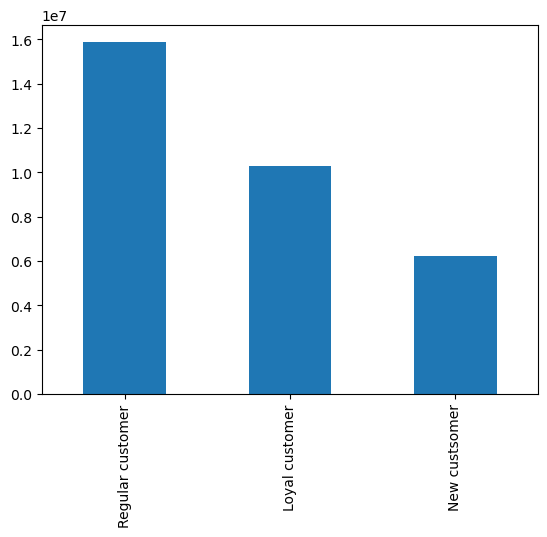

In [27]:
#loyalty flag bar chart
bar2 = merged['loyalty_flag'].value_counts().plot.bar()

In [28]:
# saving image
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

## 5.

In [29]:
# making sample
df_3 = small[['order_hour_of_day','prices']]

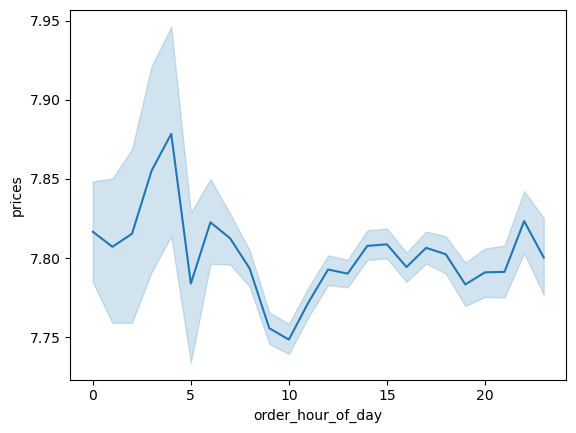

In [30]:
# line chart
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [31]:
# saving image
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

## 6.

In [33]:
# making sample
df_4 = small[['age','n_dependants']]

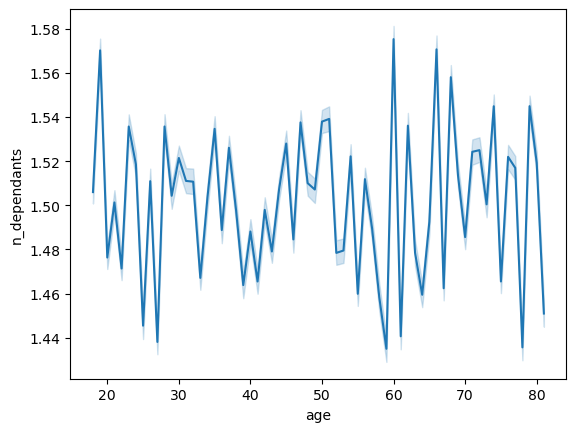

In [34]:
# line chart
line3 = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

#6
This line chart is showing age of customer compared to the number of dependants they have. There is really no uniformity or pattern to this line chart and it is filled with a lot of peaks and valleys. If anything once age gets past 60 the highs of number of dependants become a bit higher than ages under 60. To me it seemss that there is no connection between age and number of dependants overall. 

In [35]:
# saving image
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_depen.png'))

## 7. 

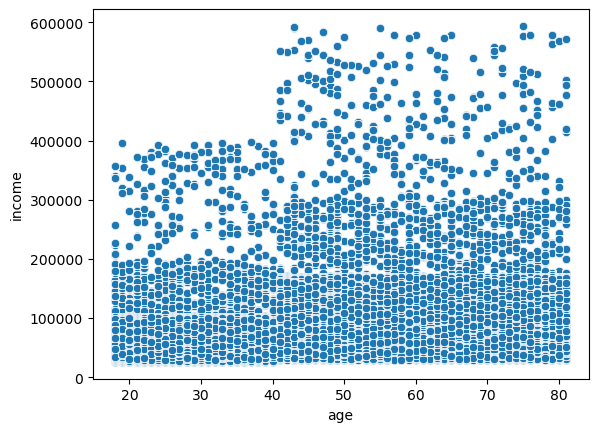

In [37]:
#scatterplot
scatter = sns.scatterplot(x = 'age', y = 'income',data = merged)

#7
In this scatterplot we are plotting age vs income. From what we can see here any income under 20,000 is consistent for every age and there are a lot of them. From ages ~42 and under, any income over 20,000 is a lot less common and those incomes max out at 40,000. For ages over ~42 there are a lot of people with an income from 20,000 - 30,000, moreso than those under 42. After the 30,000 threshold is met those people with an income above it become less and less and income maxes out around 60,000. 

In [38]:
# saving image
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))